In [68]:
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set()

In [69]:
uri_filmes = "https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv"
filmes = pd.read_csv(uri_filmes)

In [70]:
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [71]:
mapa = {
    "movieId":"filme_id",
    "title":"titulo",
    "genres":"generos"
}
filmes = filmes.rename(columns=mapa)
filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [72]:
generos = filmes.generos.str.get_dummies()
generos.head()
dados_dos_filmes = pd.concat([filmes,generos],axis=1)
dados_dos_filmes.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
from sklearn.preprocessing  import StandardScaler

In [74]:
scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)
generos_escalados.shape

O:\Anaconda3\envs\aluraenv\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
O:\Anaconda3\envs\aluraenv\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


(9742, 20)

# K-Means

In [75]:
from sklearn.cluster import KMeans

In [76]:
modelo = KMeans(n_clusters=3)

modelo.fit(generos_escalados)

print(f"Grupos {modelo.labels_}")

Grupos [2 2 0 ... 0 2 0]


In [77]:
print(f"Grupos {modelo.cluster_centers_}")

Grupos [[ 0.02556664 -0.47232404 -0.27698702 -0.25201016 -0.27045122  0.08157893
  -0.03457871  0.08971174  0.17341867 -0.1506535   0.0316345   0.00784882
  -0.11675995 -0.00261557  0.01990755  0.1352257  -0.26601823 -0.08825631
  -0.01723422 -0.00296574]
 [-0.05917995  1.63586325  0.52584915 -0.16888363 -0.26456111 -0.38955219
   0.26548038 -0.21034137 -0.31514066  0.10287848 -0.06336851  0.09732726
   0.30641625 -0.17754168 -0.00603598 -0.33167223  0.8713537   0.51022694
   0.13448111  0.0470992 ]
 [-0.05917995 -0.10115377  0.89499079  2.239367    2.58666413  0.2530539
  -0.32821014 -0.20175279 -0.59135944  0.88995462 -0.09492563 -0.27243349
   0.19068706  0.41024562 -0.13424006 -0.27192903  0.05306778 -0.46923853
  -0.16834631 -0.08171191]]


In [78]:
grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)
grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.025567,-0.472324,-0.276987,-0.252010,-0.270451,0.081579,-0.034579,0.089712,0.173419,-0.150653,0.031634,0.007849,-0.116760,-0.002616,0.019908,0.135226,-0.266018,-0.088256,-0.017234,-0.002966
1,-0.059180,1.635863,0.525849,-0.168884,-0.264561,-0.389552,0.265480,-0.210341,-0.315141,0.102878,-0.063369,0.097327,0.306416,-0.177542,-0.006036,-0.331672,0.871354,0.510227,0.134481,0.047099
2,-0.059180,-0.101154,0.894991,2.239367,2.586664,0.253054,-0.328210,-0.201753,-0.591359,0.889955,-0.094926,-0.272433,0.190687,0.410246,-0.134240,-0.271929,0.053068,-0.469239,-0.168346,-0.081712


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000001722BAC8>,
      dtype=object)

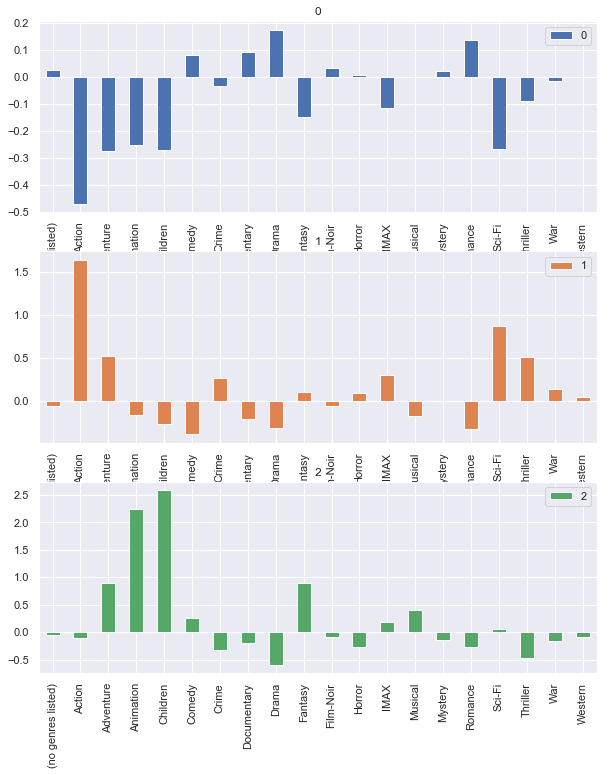

In [79]:
grupos.T.plot.bar(subplots=True, figsize=(10,12),sharex=False,grid=True)



In [80]:
grupo = 0
filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
6643,56607,"Kite Runner, The (2007)",Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2097,2791,Airplane! (1980),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6156,44204,Tsotsi (2005),Crime|Drama,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6691,58287,Descent (2007),Drama|Thriller,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4156,5984,"Story of O, The (Histoire d'O) (1975)",Drama|Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
721,941,"Mark of Zorro, The (1940)",Adventure,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4718,7037,High Heels (Tacones lejanos) (1991),Comedy|Drama,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4182,6027,Dogfight (1991),Drama|Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
262,302,"Queen Margot (Reine Margot, La) (1994)",Drama|Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
620,785,Kingpin (1996),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
from sklearn.manifold import TSNE
import seaborn as sns

In [66]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[ 28.808851  ,  65.06169   ],
       [ 42.69223   ,   6.507088  ],
       [  1.3745937 ,  26.170946  ],
       ...,
       [-17.680716  ,   0.12672526],
       [ 38.33311   ,  41.657047  ],
       [ 17.051327  , -17.95103   ]], dtype=float32)

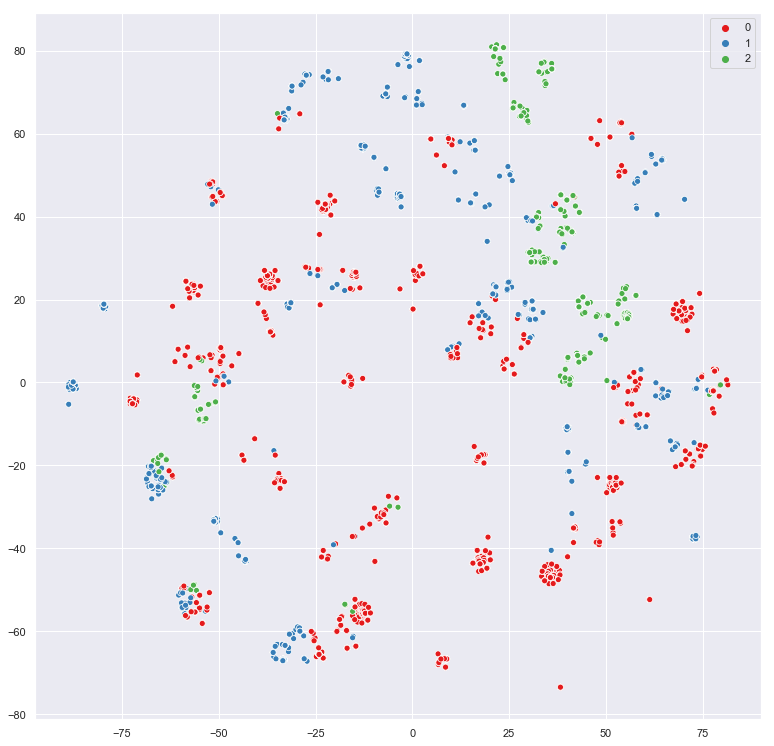

In [85]:
sns.set(rc={"figure.figsize":[13,13]})#tamanho da figura


sns.scatterplot(x=visualizacao[:,0], y=visualizacao[:,1],hue=modelo.labels_, palette=sns.color_palette("Set1",3))